$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 6: Neural Networks

Bradley Pospeck

## Overview

Using provided neural network classes as well as a machine learning utilities class provided by Dr. Anderson, this assignment will be writing code to use those classes. It will be able to take in a variable amount of data, iterations, and hidden layer structures in order to use standard neural networks or classifiers.

## Imports

The first 3 classes are the provided classes, while the rest are other external libraries that will be used.

In [1]:
# Files provided by Dr. Anderson
import neuralnetworks as nn # Contains a class for basic neural networks as well as classification neural networks
import scaledconjugategradient as scg
import mlutils as ml
# Other external libraries
import time
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Required Code

`trainNNs` will take several parameters:

    1. X: input data
    2. T: output data
    3. trainFraction: The percent of the input data that will be used to train the neural network
    4. hiddenLayerStructures: A list containing how many layers and how many units in each layer for the neural network
    5. numberRepetitions: The number of trains the data will be trained and tested
    6. numberIterations: The number of times Scaled Conjugage Gradient (SCG) will be run while training a neural network
    7. classify: A boolean that says if we'll be doing classification or not. False by default
    
The function will return a list containing the following in each element of its list:

    1. Hidden Layer Structure
    2. Training data performance in a list
    3. Testing data performance in a list
    4. How long it took to run for the number of repetitions specified

In [2]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False, errorTrace=False):
    """Trains and tests data with neural networks using a specificed structure, repetitions, and iterations.
    Returns a list of results."""
    results = []
    for hiddenLayer in hiddenLayerStructures:
        res = [hiddenLayer]     # Keeps track of each result list at a single hiddenLayer
        trainPerformance = []   # Keeps track of training error for each rep
        testPerformance = []    # Keeps track of testing error for each rep
        startTime = time.time() # Timing how long it takes to go through numberRepetitions, this  keeps track of start
        for rep in range(numberRepetitions):
            xTrain,tTrain,xTest,tTest = ml.partition(X, T, (trainFraction, 1-trainFraction))
            # Make sure we're using the correct neural network for the given data set
            if classify:
                nnet = nn.NeuralNetworkClassifier(X.shape[1], hiddenLayer, len(np.unique(T)))
            else:
                nnet = nn.NeuralNetwork(X.shape[1], hiddenLayer, T.shape[1])
            nnet.train(xTrain, tTrain, rep)
            outTrain = nnet.use(xTrain) # training output after using the trained network
            outTest = nnet.use(xTest)   # testing output after using the trained network
            if classify: # calculate the fraction of samples incorrectly classified for training and testing sets
                trainErr = 100*np.sum(outTrain!=tTrain)/len(tTrain)
                testErr = 100*np.sum(outTest!=tTest)/len(tTest)
            else:  # calculate the RMSE of training and testing sets
                trainErr = (np.sum(outTrain - tTrain)**2 / len(tTrain))**(1/2)
                testErr = (np.sum(outTest - tTest)**2 / len(tTest))**(1/2)
            trainPerformance.append(trainErr)
            testPerformance.append(testErr)
        # Now we finish building the individual result list
        if errorTrace:
            print(nnet.getErrorTrace())
        res.append(trainPerformance)
        res.append(testPerformance)
        res.append(time.time() - startTime)
        results.append(res) # Add the individual result into our results collection
    return results

After obtaining a list of results, it may be more useful to obtain a summary of the data. This entails averaging out the results from training and testing data. That is what `summarize` does.

In [3]:
def summarize(res):
    """Takes training and tesing performances from res and replaces them with their means"""
    # training data is at index 1 of results
    # testing data is at index 2 of results
    results = copy.deepcopy(res)
    for result in results:
        trainAvg = 0
        testAvg = 0
        train = result[1]
        test = result[2]
        for t in train:
            trainAvg += t
        for t in test:
            testAvg += t
        trainAvg /= len(result[1])
        testAvg /= len(result[2])
        result[1] = trainAvg
        result[2] = testAvg
    return results

Next is writing a simple function that determines which network performed the best. 'Best' is considered to be the neural network with the smallest results from test data.

In [4]:
def bestNetwork(summary):
    """Takes a summary from summarize() and returns the best element"""
    best = 0 # keeps track of index of best element
    for i in range(len(summary)):
        if summary[i][2] < summary[best][2]:
            best = i
    return summary[best]

## Testing

Just some simple examples that came with the notebook, allowing me to test my code and make sure it works as intended.

In [5]:
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

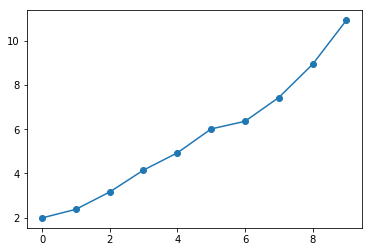

In [7]:
plt.plot(X, T, 'o-');

In [8]:
nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.45601454,  0.45601454,  0.45601454,  0.45601454,
        0.45601454,  0.45601454,  0.45601454,  0.45601454,  0.45601454,
        0.45601454,  0.35325981,  0.20010895,  0.19120699,  0.18190464,
        0.15276292,  0.13919152,  0.13792575,  0.12033318,  0.11122306,
        0.10409379,  0.10253338,  0.09467165,  0.09426863,  0.09402579,
        0.08567555,  0.08522544,  0.0825783 ,  0.08027287,  0.07973706,
        0.07946104,  0.0792988 ,  0.07872064,  0.07872064,  0.07872064,
        0.07872064,  0.07872064,  0.07872064,  0.07872064,  0.07872064,
        0.07872064,  0.07527196,  0.06625273,  0.06510114,  0.06233388,
        0.06225022,  0.06215868,  0.06022551,  0.05929749,  0.05929749,
        0.05929749,  0.05929749,  0.0557945 ,  0.04416344,  0.04298445,
        0.04263621,  0.04262727,  0.04253835,  0.04144373,  0.03931425,
        0.03798765,  0.03607897,  0.03563941,  0.03557649,  0.03548823,
        0.03543209,  0.03414158,  0.03407493,  0.03393337,  0.03

In [9]:
nnet = nn.NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.50140904,  0.50140904,  0.46213422,  0.23200393,
        0.14415783,  0.13857906,  0.13169036,  0.09905276,  0.09521708,
        0.09446173,  0.08342244,  0.07607262,  0.05610176,  0.05288347,
        0.04927334,  0.03982374,  0.03906626,  0.03890681,  0.03862366,
        0.03857279,  0.03716488,  0.03682787,  0.0339058 ,  0.03298691,
        0.03244128,  0.03196218,  0.03160052,  0.03129144,  0.0310356 ,
        0.0297722 ,  0.02855663,  0.02832847,  0.02783569,  0.02659146,
        0.02640814,  0.02632786,  0.02628871,  0.02623355,  0.02622551,
        0.02621262,  0.02603208,  0.0259498 ,  0.02557482,  0.02490394,
        0.02483608,  0.02480517,  0.02464307,  0.02459305,  0.02441486,
        0.02440625,  0.02440434,  0.02413466,  0.02405227,  0.02396975,
        0.02374611,  0.02374107,  0.02373861,  0.02368109,  0.02362852,
        0.02358513,  0.02338576,  0.0233522 ,  0.02326354,  0.02325761,
        0.02323437,  0.0231772 ,  0.02317008,  0.02312485,  0.02

In [10]:
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results

[[2,
  [1.8841109504205299e-15,
   2.0585660031764768,
   0.08898134970383853,
   0.13186992749043155,
   0.34404483682232889],
  [0.050719193635307538,
   0.89274621835494861,
   1.6126617681120246,
   0.58634252221230265,
   0.73567619878136514],
  0.009024858474731445],
 [10,
  [1.2560739669470201e-15,
   0.25712894990835466,
   0.035827975454430748,
   0.04919370738740645,
   0.0071613521768572105],
  [1.2781741340181247,
   0.11417154352813465,
   1.6870183791931466,
   1.0937838117367324,
   0.85730667357231605],
  0.005011081695556641],
 [[10, 10],
  [6.2803698347351007e-16,
   3.4114876129806495,
   0.14864592976738791,
   0.21791651596240025,
   0.095876962384827624],
  [6.0949117035135911,
   1.529967789264961,
   0.13267828997322026,
   0.49727947965457897,
   0.098219406622090583],
  0.008012056350708008]]

In [11]:
results = trainNNs(X, T, 0.8, [0, 1, 2, 10, [10, 10], [5, 5, 5, 5], [2]*5], 50, 400, classify=False)

In [12]:
summarize(results)

[[0, 4.302053336793543e-16, 0.66899335398600346, 0.046503305435180664],
 [1, 0.26292309871767949, 0.70996127017401134, 0.2995314598083496],
 [2, 0.15420256101901936, 0.68771817623304277, 0.33443403244018555],
 [10, 0.10652277015569504, 0.55595486756986512, 0.5085062980651855],
 [[10, 10], 0.12547405306758971, 0.54284250591487149, 0.45682191848754883],
 [[5, 5, 5, 5], 0.29092388584580336, 0.75732539367103047, 1.0726242065429688],
 [[2, 2, 2, 2, 2],
  0.39510704888476977,
  0.93880865485272691,
  1.0808765888214111]]

In [13]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

[[10, 10], 0.12547405306758971, 0.54284250591487149, 0.45682191848754883]
Hidden Layers [10, 10] Average RMSE Training 0.13 Testing 0.54 Took 0.46 seconds


Everything is working correctly. In this simple example, it appears that the neural network with no hidden layers had the smallest testing error. This essentially means linear regression was performed. This result would make sense as the training data was essentially linear. The other neural networks most likely overfit the data and ended up doing poorly on the testing data.

## Appliances Energy Prediction

From the UCI Machine Learning Repository, download the [Appliances energy prediction](http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) data.

A relatively easy way to read this data in is using pandas, so let's import that now. We can ignore both the first column and the last 2 columns of this data.

In [14]:
import pandas as pd

info = pd.read_csv('energydata_complete.csv',delimiter=',',usecols=range(1,27))
info

Appliances  lights         T1       RH_1         T2       RH_2  \
0              60      30  19.890000  47.596667  19.200000  44.790000   
1              60      30  19.890000  46.693333  19.200000  44.722500   
2              50      30  19.890000  46.300000  19.200000  44.626667   
3              50      40  19.890000  46.066667  19.200000  44.590000   
4              60      40  19.890000  46.333333  19.200000  44.530000   
5              50      40  19.890000  46.026667  19.200000  44.500000   
6              60      50  19.890000  45.766667  19.200000  44.500000   
7              60      50  19.856667  45.560000  19.200000  44.500000   
8              60      40  19.790000  45.597500  19.200000  44.433333   
9              70      40  19.856667  46.090000  19.230000  44.400000   
10            230      70  19.926667  45.863333  19.356667  44.400000   
11            580      60  20.066667  46.396667  19.426667  44.400000   
12            430      50  20.133333  48.000000  19.566667  44.400000   
13            250      40  20.260000  52.726667  19.730000  45.100000   
14            100      10  20.426667  55.893333  19.856667  45.833333   
15            100      10  20.566667  53.893333  20.033333  46.756667   
16             90      10  20.730000  52.660000  20.166667  47.223333   
17             70      30  20.856667  53.660000  20.200000  47.056667   
18             80      30  20.890000  51.193333  20.200000  46.330000   
19            140      40  20.890000  49.800000  20.200000  46.026667   
20            120      20  20.890000  48.433333  20.200000  45.722500   
21            190      40  20.963333  47.633333  20.260000  45.530000   
22            110      40  21.033333  47.063333  20.290000  45.223333   
23            110      40  21.100000  46.596667  20.356667  44.963333   
24            110      30  21.133333  46.060000  20.426667  44.760000   
25            110      20  21.200000  45.800000  20.500000  44.760000   
26            100      30  21.290000  45.900000  20.533333  45.090000   
27            100      20  21.356667  45.826667  20.666667  45.163333   
28            100      20  21.390000  45.690000  20.700000  45.060000   
29            100      20  21.500000  45.333333  20.700000  44.933333   
...           ...     ...        ...        ...        ...        ...   
19705         280       0  25.033333  48.363333  26.528571  40.595714   
19706         240       0  25.166667  48.156667  26.600000  40.940000   
19707         250       0  25.323333  47.930000  26.600000  41.012857   
19708         220       0  25.390000  47.656667  26.600000  41.036000   
19709         230       0  25.500000  47.133333  26.600000  41.000000   
19710         190      10  25.500000  47.060000  26.540000  41.000000   
19711         160       0  25.600000  46.990000  26.512500  41.203750   
19712          80       0  25.600000  46.730000  26.437143  41.384286   
19713          60       0  25.566667  46.633333  26.370000  41.378000   
19714          60       0  25.500000  46.360000  26.318571  41.264286   
19715          60       0  25.500000  46.060000  26.350000  41.000000   
19716          60       0  25.500000  45.933333  26.277143  41.000000   
19717          70       0  25.500000  45.760000  26.200000  41.000000   
19718          80       0  25.500000  45.626667  26.171429  41.000000   
19719          80       0  25.500000  45.590000  26.100000  41.000000   
19720          70       0  25.500000  45.522500  26.100000  41.051429   
19721         100       0  25.500000  45.633333  26.080000  41.196000   
19722         100       0  25.500000  45.730000  26.000000  41.428571   
19723          90       0  25.500000  45.790000  26.000000  41.590000   
19724         100       0  25.500000  45.933333  26.000000  41.652857   
19725         220       0  25.426667  46.060000  26.000000  41.700000   
19726         180       0  25.500000  46.530000  26.000000  41.725714   
19727         120       0  25.500000  47.456667  26.000000  42.32

This leaves us with a pandas data frame that we need to convert into a numpy array for the neural network functions to work correctly. Let's first extract the column names.

In [15]:
names = info.columns.values.tolist()
names

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

Looks like all of the columns are accounted for in this list. Let's get all of the data extracted now.

In [16]:
data = info.values
data

array([[  60.        ,   30.        ,   19.89      , ...,    7.        ,
          63.        ,    5.3       ],
       [  60.        ,   30.        ,   19.89      , ...,    6.66666667,
          59.16666667,    5.2       ],
       [  50.        ,   30.        ,   19.89      , ...,    6.33333333,
          55.33333333,    5.1       ],
       ..., 
       [ 270.        ,   10.        ,   25.5       , ...,    3.66666667,
          25.33333333,   13.26666667],
       [ 420.        ,   10.        ,   25.5       , ...,    3.83333333,
          26.16666667,   13.23333333],
       [ 430.        ,   10.        ,   25.5       , ...,    4.        ,
          27.        ,   13.2       ]])

In [17]:
data.shape

(19735, 26)

Looks good. Time to setup the data in such a way that it works with `trainNNs`. The first 2 columns, `Appliances` and `Lights`, will be the target variables with the other 24 columns being the input features.

In [18]:
Xenergy = data[:,2:]
Tenergy = data[:,0:2]
Xenergy,Tenergy

(array([[ 19.89      ,  47.59666667,  19.2       , ...,   7.        ,
          63.        ,   5.3       ],
        [ 19.89      ,  46.69333333,  19.2       , ...,   6.66666667,
          59.16666667,   5.2       ],
        [ 19.89      ,  46.3       ,  19.2       , ...,   6.33333333,
          55.33333333,   5.1       ],
        ..., 
        [ 25.5       ,  46.59666667,  25.62857143, ...,   3.66666667,
          25.33333333,  13.26666667],
        [ 25.5       ,  46.99      ,  25.414     , ...,   3.83333333,
          26.16666667,  13.23333333],
        [ 25.5       ,  46.6       ,  25.26428571, ...,   4.        ,
          27.        ,  13.2       ]]), array([[  60.,   30.],
        [  60.,   30.],
        [  50.,   30.],
        ..., 
        [ 270.,   10.],
        [ 420.,   10.],
        [ 430.,   10.]]))

In [19]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [20]:
Xnames = names[2:]
Tnames = names[0:2]

In [21]:
Xnames

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [22]:
Tnames

['Appliances', 'lights']

Now all of my X's and T's are setup correctly. Time to train!

Ten different neural networks will be used for training. They will be defined as follows:

In [23]:
nnStructures = [0, 5, 10, 100, [5,5], [10,10], [5,5,5], [10,10,10], [10,5,10], [5,10,5]]

These nets will be trained for 100 iterations initially. If errors in any of the networks is still decreasing after 100 iterations, it will be a good idea to increase the number of iterations and try again. Using `nnet.getErrorTrace()` will be how we see what the error is doing.

In [24]:
results = trainNNs(Xenergy, Tenergy, 0.8, nnStructures, 10, 100, errorTrace=True)

[ 0.70710678  0.69716061  0.68050009  0.67294757  0.65821762  0.65156596
  0.64510687  0.64284823  0.6424424   0.64064585]
[ 0.70710678  0.69782834  0.69782834  0.69782834  0.68874099  0.68123398
  0.66956845  0.66691113  0.66335229  0.66109475]
[ 0.70710678  0.69998406  0.69998406  0.69998406  0.69998406  0.69998406
  0.69998406  0.69998406  0.69904795  0.68230648]
[ 0.70710678  0.69613489  0.67591853  0.66218834  0.65997831  0.65401436
  0.65147007  0.64642795  0.64426772  0.64257717]
[ 0.70710678  0.70501003  0.70501003  0.70501003  0.70501003  0.70501003
  0.70501003  0.70501003  0.70501003  0.70415564]
[ 0.70710678  0.6973797   0.6973797   0.6973797   0.68725105  0.6829182
  0.67831517  0.67417021  0.67402767  0.6680557 ]
[ 0.70710678  0.70397741  0.70329887  0.69925599  0.69674637  0.69327386
  0.69217519  0.68316731  0.68087648  0.67240368]
[ 0.70710678  0.70476042  0.70333021  0.70333021  0.69924268  0.69876138
  0.69815534  0.68880954  0.68382138  0.67875168]
[ 0.70710678  0.7

After multiple runs, it appears that the errors have stopped dropping with just 100 iterations of SCG. Let's find out which network is the best.

In [25]:
summarize(results)

[[0, 1.7641602407540087e-09, 111.2760176618477, 0.5574815273284912],
 [5, 197.4371055599122, 149.43229687762641, 1.4634120464324951],
 [10, 162.98628611411638, 116.34066725549322, 1.710550308227539],
 [100, 305.07962719689147, 139.28568713019968, 14.571782350540161],
 [[5, 5], 434.75171983623784, 235.3462788096264, 1.2809076309204102],
 [[10, 10], 675.64251407826396, 338.73133695431108, 2.789422035217285],
 [[5, 5, 5], 507.99114545949789, 233.21172668273684, 1.9998221397399902],
 [[10, 10, 10], 616.97187536085073, 272.95674888101502, 3.978602886199951],
 [[10, 5, 10], 455.84500168861541, 271.69359620023624, 2.4756245613098145],
 [[5, 10, 5], 354.21219275324063, 202.97389072192178, 2.000321865081787]]

In [26]:
bestNetwork(summarize(results))

[0, 1.7641602407540087e-09, 111.2760176618477, 0.5574815273284912]

Running several times has yielded the hidden layer of 0 to be the best most often. Even when it wasn't the best structure, it was usually a single hidden layer of 5 or 10 units that would be best. Since this is the case, it is likely the data is actually fairly linear. More complicated neural networks would be overfitting that. Overfitting yields exceptionally low training errors, but larger testing errors as it can't generalize well to new data. However, that doesn't seem to be the case here. Even the training error is large with more complicated networks.

Now it's time to inspect the neural network structure of 0 hidden layers more closely with this data. I'll be using a training fraction of 80% and keep the number of repetitions consistent with above at 10.

In [27]:
trainFraction = .8
rep = 10
xTrain,tTrain,xTest,tTest = ml.partition(Xenergy, Tenergy, (trainFraction, 1-trainFraction))
nnet = nn.NeuralNetwork(Xenergy.shape[1], 0, Tenergy.shape[1])
nnet.train(xTrain, tTrain, rep)
predicted = nnet.use(xTest)
predicted

array([[ 118.0009244 ,    6.31553183],
       [ 104.20781324,   -3.29573486],
       [  90.13794092,    1.91585532],
       ..., 
       [  45.32905922,   -1.0857289 ],
       [ 119.90077093,    2.45525842],
       [  87.25607056,    5.0657293 ]])

I'll separate the predicted and actual `Appliances` energy use from the `Lights` energy use and plot each predicted energy use from its actual energy use.

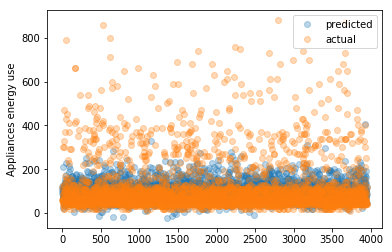

In [28]:
plt.plot(predicted[:,0], 'o', label='predicted', alpha=.3);
plt.plot(tTest[:,0], 'o', label= 'actual', alpha=.3);
plt.ylabel(Tnames[0] + ' energy use');
plt.legend();

Overall, this appears to have done fairly well with the appliances' energy use. There are a lot of data points at higher energy uses that the model could not predict well, but considering there are almost 4000 samples to choose from, those samples are a relatively small fraction of the whole thing.

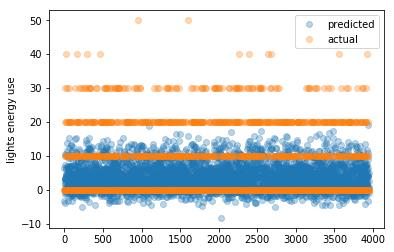

In [29]:
plt.plot(predicted[:,1], 'o', label = 'predicted', alpha=.3);
plt.plot(tTest[:,1], 'o', label='actual', alpha=.3);
plt.ylabel(Tnames[1] + ' energy use');
plt.legend();

Predicting light energy use did not go well at all. For some reason, all of the predictions lie within the -10 to 20 range and never succesffully predict the 20, 30 or 40 energy use values. This would explain why there's such a large error above. It almost looks like the neural network is attempting to fit data better to the appliance output instead of the light output. Given the small training error, maybe even 0 hidden layers is overfitting the data in training somehow. 

In [30]:
results = trainNNs(Xenergy, Tenergy, 0.8, nnStructures, 5, 10, errorTrace=True)

[ 0.70710678  0.69755738  0.68094512  0.67369609  0.6596181 ]
[ 0.70710678  0.69934968  0.69934968  0.69075821  0.68308228]
[ 0.70710678  0.69935651  0.69935651  0.69935651  0.69935651]
[ 0.70710678  0.6958709   0.68085999  0.67232568  0.65997588]
[ 0.70710678  0.70317397  0.70317397  0.70317397  0.70317397]
[ 0.70710678  0.70212546  0.70212546  0.70212546  0.70212546]
[ 0.70710678  0.70375159  0.70214889  0.69806824  0.69670735]
[ 0.70710678  0.7033188   0.70157401  0.70157401  0.69828264]
[ 0.70710678  0.70647891  0.70647891  0.70066072  0.69917401]
[ 0.70710678  0.70614266  0.70614266  0.70614266  0.70344294]


In [31]:
summarize(results)

[[0, 1.0455442912863235e-09, 80.549537665281065, 0.215071439743042],
 [5, 236.74392578053443, 197.74276959139826, 0.4742710590362549],
 [10, 41.895163952560608, 100.18518982397464, 0.5289080142974854],
 [100, 160.81152488342667, 135.58453969987985, 4.13099217414856],
 [[5, 5], 577.89561470701597, 266.66972921396359, 0.47275686264038086],
 [[10, 10], 807.68377491650722, 382.96196793142724, 0.7981259822845459],
 [[5, 5, 5], 219.70979273741841, 155.23349414374539, 0.6843187808990479],
 [[10, 10, 10], 615.76363671714296, 271.84737340110996, 1.136533498764038],
 [[10, 5, 10], 398.64504573001022, 257.10646495957945, 0.9715840816497803],
 [[5, 10, 5], 289.20738304665235, 175.19525990965437, 1.0422735214233398]]

It doesn't seem to matter how many iterations or repetitions are done. No hidden layers always appears to overfit the training data while the rest of the neural net structures do poorly on training and testing.

## Anuran Calls (MFCCs)

From the UCI Machine Learning Repository, I will be using the [Anuran Calls (MFCCs)](http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29) data.
     
I'll stick with using pandas to read the data in as that was a relatively simple way to do so. There will be 22 audio features used to identify the frog, making for 22 input columns. I will be trying to classify the species only, leaving just a single column for the outputs. There are 10 unique species in this data set. In order to first classify, we'll need to convert the string names of the classes to integer values representing those classes. This will be achieved using `numpy.unique()`.

In [32]:
info = pd.read_csv('Frogs_MFCCs.csv',delimiter=',',usecols=range(0,22))
Xanuran = info.values
info = pd.read_csv('Frogs_MFCCs.csv',delimiter=',',usecols=[24])
Tanuran = info.values
Xanuran.shape, Tanuran.shape

((7195, 22), (7195, 1))

In [33]:
Xanuran.shape, Tanuran.shape

((7195, 22), (7195, 1))

In [34]:
classNames = np.unique(Tanuran).tolist()
_,Tanuran = np.unique(Tanuran, return_inverse=True)
Tanuran

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [35]:
classNames

['AdenomeraAndre',
 'AdenomeraHylaedactylus',
 'Ameeregatrivittata',
 'HylaMinuta',
 'HypsiboasCinerascens',
 'HypsiboasCordobae',
 'LeptodactylusFuscus',
 'OsteocephalusOophagus',
 'Rhinellagranulosa',
 'ScinaxRuber']

In [36]:
Xanuran[:2,:]

array([[ 1.        ,  0.1529363 , -0.1055859 ,  0.20072191,  0.31720106,
         0.26076385,  0.10094464, -0.1500626 , -0.17112763,  0.12467644,
         0.18865415, -0.07562172, -0.15643593,  0.08224512,  0.13575204,
        -0.02401665, -0.10835111, -0.07762252, -0.0095678 ,  0.05768398,
         0.11868014,  0.01403845],
       [ 1.        ,  0.17153426, -0.09897474,  0.26842522,  0.33867186,
         0.2683531 ,  0.06083509, -0.22247464, -0.20769267,  0.17088287,
         0.27095828, -0.09500394, -0.25434147,  0.02278623,  0.1633201 ,
         0.01202228, -0.09097401, -0.05650952, -0.03530336,  0.02013996,
         0.08226299,  0.02905574]])

In [37]:
Tanuran = np.reshape(Tanuran,(-1,1))

In [38]:
Tanuran[:2]

array([[0],
       [0]], dtype=int64)

In [39]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


Now to train! I'll be using the same 10 `nnStructures` as defined for the previous data set.

In [40]:
results = trainNNs(Xanuran, Tanuran, 0.8, nnStructures, 20, 750, classify=True, errorTrace=True)

[ 0.23025851  0.0730075   0.04969225  0.04247795  0.03390881  0.02801365
  0.0242957   0.0221195   0.01931926  0.01784034  0.01694715  0.01694715
  0.01694715  0.01694715  0.01694715  0.01694715  0.01694715  0.01694715
  0.01694715  0.01694715]
[ 0.23025851  0.18814771  0.18814771  0.14349827  0.12738483  0.1197399
  0.10775196  0.10476575  0.0966831   0.0833389   0.07681759  0.07420064
  0.06344886  0.06344886  0.06344886  0.06344886  0.05964109  0.05623074
  0.04973926  0.04580621]
[ 0.23025851  0.13288436  0.09879853  0.07850181  0.06590783  0.06590783
  0.06590783  0.06590783  0.06590783  0.06583477  0.05510998  0.05057242
  0.04651236  0.04145196  0.03505032  0.03002324  0.02768796  0.02404178
  0.02114689  0.0191103 ]
[ 0.23025851  0.07257965  0.04075826  0.0347474   0.02605201  0.02149689
  0.01936713  0.01687821  0.01423098  0.01300316  0.01116656  0.00984107
  0.0086804   0.00775139  0.00725135  0.00674723  0.00574215  0.00501583
  0.00424251  0.00375217]
[ 0.23025851  0.21091

It looks like some of the errors may still be dropping, so I'll increase iterations of SCG up to 1000 and see how that looks.

In [41]:
results = trainNNs(Xanuran, Tanuran, 0.8, nnStructures, 50, 1000, classify=True, errorTrace=True)

[ 0.23025851  0.07302164  0.04784071  0.0419602   0.03263237  0.02752068
  0.02347231  0.02142463  0.01906141  0.01745698  0.01603032  0.01491342
  0.01426953  0.01387744  0.01336603  0.01301253  0.01277615  0.01229014
  0.01197187  0.01160694  0.01140988  0.01126031  0.01113065  0.01110151
  0.01110151  0.01110151  0.01110151  0.01110151  0.01110151  0.01110151
  0.01110151  0.01110151  0.01110151  0.01110151  0.01110151  0.01110151
  0.01110151  0.01109771  0.01085057  0.01064041  0.01051335  0.01038391
  0.01025127  0.01018816  0.01007333  0.01000213  0.00994923  0.00994923
  0.00994923  0.0099413 ]
[ 0.23025851  0.19224344  0.19224344  0.17373364  0.12054292  0.10322172
  0.09489997  0.07393687  0.06499976  0.05364726  0.04973234  0.04814319
  0.0449754   0.04153632  0.03973845  0.03567735  0.03351493  0.03133262
  0.0293721   0.02801335  0.02742107  0.0254975   0.02482346  0.02400629
  0.02283647  0.02169087  0.02078515  0.02014045  0.01933605  0.01881443
  0.01828879  0.01810115 

Errors are still going down a little bit for some structures, but I think this is good enough. Most of the error reductions are pretty small at this point.

In [42]:
summarize(results)

[[0, 5.2293259207783196, 5.7526059763724797, 8.774352073669434],
 [5, 15.425990271021538, 15.713690062543437, 19.499895572662354],
 [10, 8.9885337039610835, 9.6038915913829079, 24.74334692955017],
 [100, 2.9947880472550379, 3.8846421125781787, 147.88418459892273],
 [[5, 5], 21.293259207783176, 21.816539263377344, 23.22580075263977],
 [[10, 10], 12.021195274496183, 12.747741487143848, 33.99973130226135],
 [[5, 5, 5], 27.65253648366922, 27.683113273106322, 27.157777309417725],
 [[10, 10, 10], 19.728630993745654, 20.162612925642808, 42.12368559837341],
 [[10, 5, 10], 21.505211952744968, 21.897150799166084, 39.802494525909424],
 [[5, 10, 5], 29.702918693537171, 29.890201528839466, 32.893194913864136]]

In [43]:
bestNetwork(summarize(results))

[100, 2.9947880472550379, 3.8846421125781787, 147.88418459892273]

Running multiple times yielded a single layer of 100 units as the best network most often. As with the previous data set, I will be inspecting that structure more closely, matching the other inputs for `trainNNs` above.

In [44]:
trainFraction = .8
rep = 50
xTrain,tTrain,xTest,tTest = ml.partition(Xanuran, Tanuran, (trainFraction, 1-trainFraction))
nnet = nn.NeuralNetworkClassifier(Xanuran.shape[1], 100, len(np.unique(Tanuran)))
nnet.train(xTrain, tTrain, rep)
predicted = nnet.use(xTest)
predicted

array([[0],
       [1],
       [5],
       ..., 
       [0],
       [1],
       [4]], dtype=int64)

In [45]:
ml.confusionMatrix(tTest,predicted,np.unique(tTest));

       0    1    2    3    4    5    6    7    8    9
    ------------------------------------------------------------
 0 | 98.5  0    0    0    0    0    0    0.7  0    0.7   (136 / 136)
 1 |  0  100.0  0    0    0    0    0    0    0    0     (677 / 677)
 2 |  0    0  100.0  0    0    0    0    0    0    0     (115 / 115)
 3 |  0    1.6  0   98.4  0    0    0    0    0    0     (64 / 64)
 4 |  0    0    0    0   99.0  1.0  0    0    0    0     (100 / 100)
 5 |  0    0    0    0    0   99.1  0.4  0.4  0    0     (231 / 231)
 6 |  0    0    0    0    0    2.0 98.0  0    0    0     (49 / 49)
 7 |  4.2  0    0    0    0    4.2  0   91.7  0    0     (24 / 24)
 8 |  0    0    0    0    0   12.5  0    0   87.5  0     (8 / 8)
 9 |  0    0    0    0    0    0    0    0    0  100.0   (35 / 35)


In [46]:
classNames

['AdenomeraAndre',
 'AdenomeraHylaedactylus',
 'Ameeregatrivittata',
 'HylaMinuta',
 'HypsiboasCinerascens',
 'HypsiboasCordobae',
 'LeptodactylusFuscus',
 'OsteocephalusOophagus',
 'Rhinellagranulosa',
 'ScinaxRuber']

This did exceptionally well. Three of the classes were predicted perfectly: 1, 2, and 9. Only 2 classes were predicted successfully less than 98% of the time and that was classes 7 and 8 which appears to be the species OsteocephalusOophagus and rhinellagranulosa. Both of those misclassificiations were pretty large compared to others. However, considering the relatively small sample size of classses 7 and 8 in this test data set, that is a large contributing factor as to why it's prediction accuracy was so low. That 12.5% is 1/8 samples that were present. It magnifies a misclassification where as one misclassification in class 0 is only 0.7%. So overall, this neural network performed very well across the board and appears to be able to generalize fairly well to new data.

Since this performed better than the other deeper neural networks, there is a possibility that the deeper networks overfit the data in training. Performing better than single layers of 0, 5, or 10 units likely indicate that those small amount of units aren't enough to capture all pertinent information to classify as well as 100 units.

## Grading

Download [A6grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A6grader.tar) and extract `A6grader.py` from it.

In [47]:
%run -i "A6grader.py"


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.3, 6.3999999999999995, 0.6]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

---  0/20 points. Network [20, 20] should be best.  You found 10 as the best.

C:\Users\Bradley\Desktop\Classes\cs440\A6 Execution Grade is 40/60

======================= The regression data set =======================

--- _/5 points. Read the data in energydata_complete.csv into variables Xenergy and Tenergy.

--- _/5 point